In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv('winequality-red.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#missing val check
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [10]:
#stastical measures
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


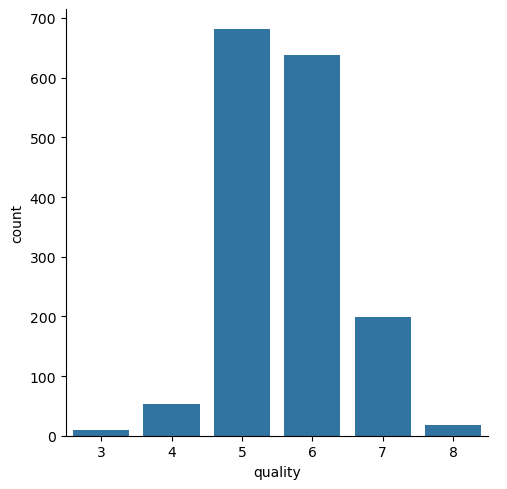

In [11]:
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

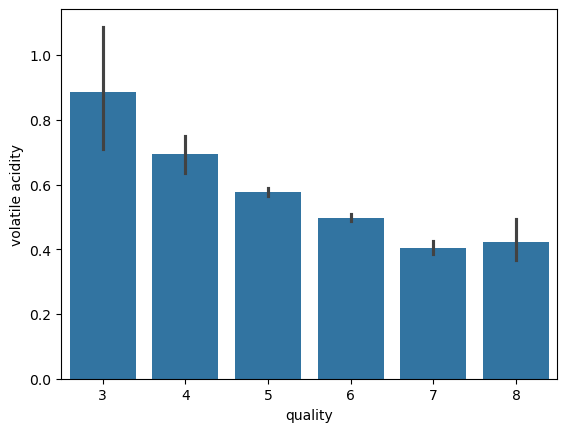

In [12]:
#volotile vs quality
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

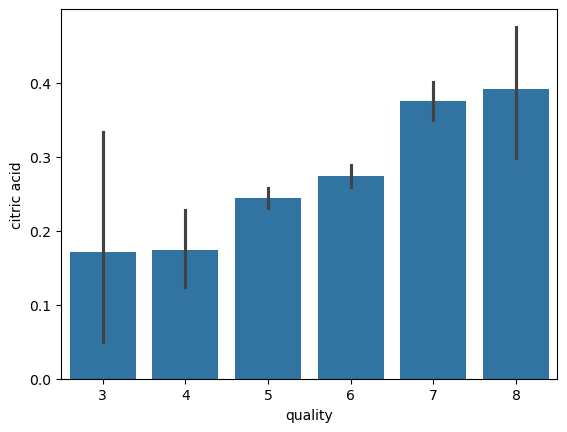

In [13]:
#citric vs quality
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

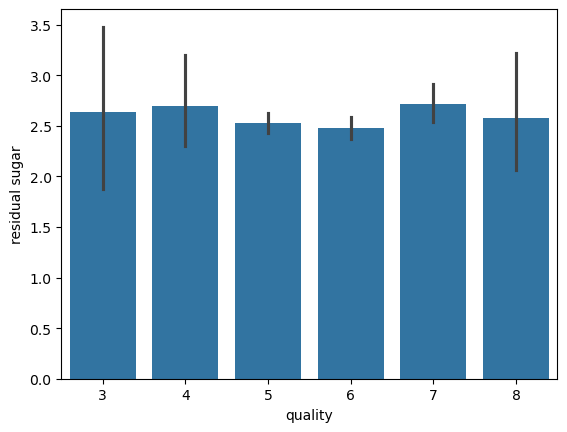

In [14]:
#residual sugar	 vs quality
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: xlabel='quality', ylabel='pH'>

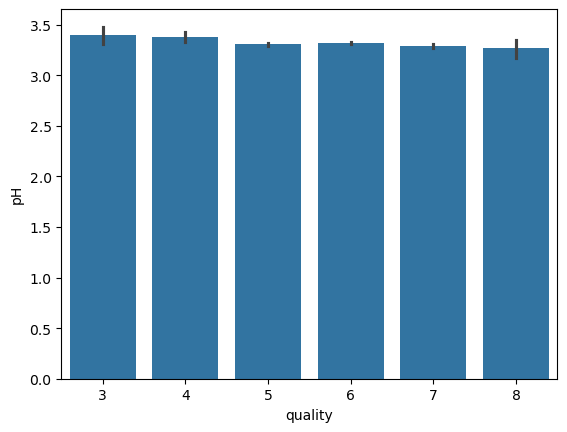

In [15]:
#ph	 vs quality
sns.barplot(x='quality',y='pH',data=df)

corelation


In [17]:
corelation=df.corr()

In [18]:
# from heatmap +1 means directly proportional and -.6 means inversly prop

<Axes: >

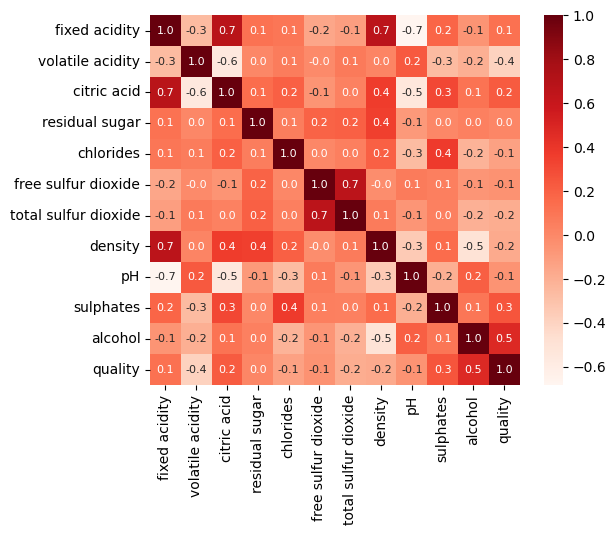

In [19]:
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8}, cmap = 'Reds')

data preprocessing


In [21]:
X = df.drop('quality',axis=1)

In [22]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
#label binarization
Y=df['quality'].apply(lambda x_value:1 if x_value>=7 else 0)

In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


train and test

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [27]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


model trainning
random forest


In [29]:
model=RandomForestClassifier()

In [30]:
model.fit(X_train,Y_train)

RandomForestClassifier()

model evaluation

In [32]:
X_test_pred=model.predict(X_test)


In [33]:
print(X_test_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
print(Y_test) # ye real h jo x se compare krenge

147     0
937     0
877     0
1000    1
73      0
       ..
841     0
889     0
1145    0
1476    0
187     0
Name: quality, Length: 320, dtype: int64


In [35]:
# accuracy score
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [36]:
print(test_data_accuracy)

0.93125


building predictive system

In [38]:
input_data = (77.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
feature_names = df.columns[:-1]  # Get feature names (exclude 'quality')
input_df = pd.DataFrame([input_data], columns=feature_names)  # Create DataFrame
  # Predict using DataFrame



prediction = model.predict(input_df)
print(prediction)
if(prediction[0]==1):
    print('good quality wine')
else:
    print('bad quality wine')

[1]
good quality wine


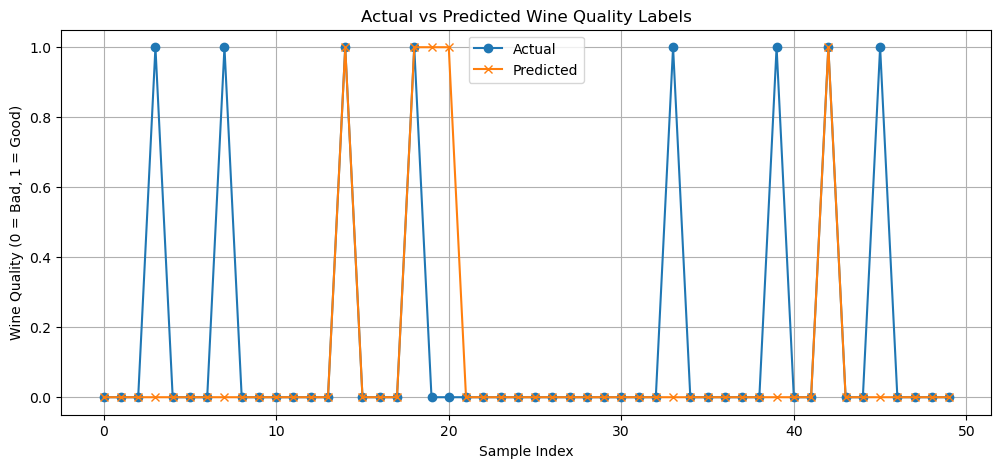

In [39]:


# Select a small sample
sample_Y = Y_test[:50].reset_index(drop=True)
sample_pred = pd.Series(X_test_pred[:50])

plt.figure(figsize=(12, 5))
plt.plot(sample_Y, label='Actual', marker='o')
plt.plot(sample_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Wine Quality Labels')
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality (0 = Bad, 1 = Good)')
plt.legend()
plt.grid(True)
plt.show()